Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
X = data.data
y = data.target

In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

{
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica
}

In [7]:
# splitting dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,:-1] = sc.fit_transform(X_train[:,:-1])
X_test[:,:-1] = sc.transform(X_test[:,:-1])

In [9]:
# Training a model on KNN,Naive Bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report

In [10]:
# Training on KNN
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
# testing data on cross validation
from sklearn.model_selection import cross_val_score,StratifiedKFold
skf = StratifiedKFold(n_splits = 3, shuffle=True,random_state=42)
cross_score = cross_val_score(knn_clf,X_train,y_train,cv = skf,scoring = 'accuracy')
print(cross_score.mean())
print(cross_score.std())

0.902086296823139
0.03245994136139364


In [12]:
# training model on GaussianNB
naive_clf = GaussianNB()
naive_clf.fit(X_train,y_train)

GaussianNB()

In [13]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
skf = StratifiedKFold(n_splits = 3, shuffle=True,random_state=42)
cross_score = cross_val_score(naive_clf,X_train,y_train,cv = skf,scoring = 'accuracy')
print(cross_score.mean())
print(cross_score.std())

0.9286391654812708
0.03353308863205158


As the variation is 0.03 and mean accuracy is 0.92 so the naive bayes model is more stable than knn

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



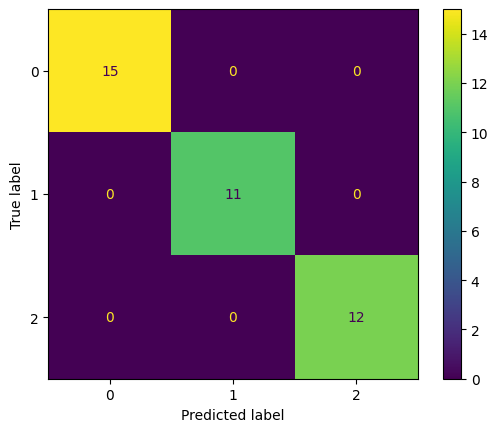

In [14]:
# predicting the X_test
y_pred = naive_clf.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_estimator(naive_clf,X_test,y_test)

As naive bayes did good on test set also with accuracy of 100 percent.

We are looking at change from the datascience repository